# EDA Life Expectancy DataSet


## Configuration and data load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
height = 800
kaggle = True

if kaggle:
    data_path = '/kaggle/input/life-expectancy-1960-to-present-global/life_expectancy_dataset.csv'
else:
    data_path = './data/life_expectancy_dataset.csv'

In [3]:
df_data = pd.read_csv(data_path, sep=';', decimal=',')

In [5]:
df_data.head(20)

,country_code,country_name,region,sub-region,intermediate-region,year,life_expectancy_women,life_expectancy_men
0,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1960,33.28,31.87
1,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1961,33.81,32.41
2,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1962,34.30,32.88
3,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1963,34.77,33.35
4,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1964,35.25,33.83
5,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1965,35.70,34.29
6,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1966,36.23,34.77
7,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1967,36.71,35.23
8,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1968,37.21,35.71
9,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1969,37.70,36.21


## Initial analysis of data

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13545 entries, 0 to 13544
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_code           13545 non-null  object 
 1   country_name           13545 non-null  object 
 2   region                 13545 non-null  object 
 3   sub-region             13545 non-null  object 
 4   intermediate-region    5670 non-null   object 
 5   year                   13545 non-null  int64  
 6   life_expectancy_women  13545 non-null  float64
 7   life_expectancy_men    13545 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 846.7+ KB


In [8]:
df_data.shape

(13545, 8)

In [9]:
df_data.describe()

,year,life_expectancy_women,life_expectancy_men
count,13545.000000,13545.000000,13545.000000
mean,1991.000000,64.517931,59.653992
std,18.184914,17.778717,16.444545
min,1960.000000,0.000000,0.000000
25%,1975.000000,57.830000,53.850000
50%,1991.000000,69.590000,63.950000
75%,2007.000000,76.050000,69.920000
max,2022.000000,88.060000,83.350000


In [10]:
df_data[df_data['life_expectancy_women']==0]

,country_code,country_name,region,sub-region,intermediate-region,year,life_expectancy_women,life_expectancy_men
189,AND,ANDORRA,EUROPE,SOUTHERN EUROPE,NaN,1960,0.0,0.0
190,AND,ANDORRA,EUROPE,SOUTHERN EUROPE,NaN,1961,0.0,0.0
191,AND,ANDORRA,EUROPE,SOUTHERN EUROPE,NaN,1962,0.0,0.0
192,AND,ANDORRA,EUROPE,SOUTHERN EUROPE,NaN,1963,0.0,0.0
193,AND,ANDORRA,EUROPE,SOUTHERN EUROPE,NaN,1964,0.0,0.0
...,...,...,...,...,...,...,...,...
11481,SYC,SEYCHELLES,AFRICA,SUB-SAHARAN AFRICA,EASTERN AFRICA,1975,0.0,0.0
11482,SYC,SEYCHELLES,AFRICA,SUB-SAHARAN AFRICA,EASTERN AFRICA,1976,0.0,0.0
11483,SYC,SEYCHELLES,AFRICA,SUB-SAHARAN AFRICA,EASTERN AFRICA,1977,0.0,0.0
11484,SYC,SEYCHELLES,AFRICA,SUB-SAHARAN AFRICA,EASTERN AFRICA,1978,0.0,0.0


In [11]:
df_data[df_data['life_expectancy_men']==0]

,country_code,country_name,region,sub-region,intermediate-region,year,life_expectancy_women,life_expectancy_men
189,AND,ANDORRA,EUROPE,SOUTHERN EUROPE,NaN,1960,0.0,0.0
190,AND,ANDORRA,EUROPE,SOUTHERN EUROPE,NaN,1961,0.0,0.0
191,AND,ANDORRA,EUROPE,SOUTHERN EUROPE,NaN,1962,0.0,0.0
192,AND,ANDORRA,EUROPE,SOUTHERN EUROPE,NaN,1963,0.0,0.0
193,AND,ANDORRA,EUROPE,SOUTHERN EUROPE,NaN,1964,0.0,0.0
...,...,...,...,...,...,...,...,...
11481,SYC,SEYCHELLES,AFRICA,SUB-SAHARAN AFRICA,EASTERN AFRICA,1975,0.0,0.0
11482,SYC,SEYCHELLES,AFRICA,SUB-SAHARAN AFRICA,EASTERN AFRICA,1976,0.0,0.0
11483,SYC,SEYCHELLES,AFRICA,SUB-SAHARAN AFRICA,EASTERN AFRICA,1977,0.0,0.0
11484,SYC,SEYCHELLES,AFRICA,SUB-SAHARAN AFRICA,EASTERN AFRICA,1978,0.0,0.0


### **Conclusions:** Here we can see that we have some records with 0 in life expectancy. It's impossible, so it is an error. In this case, we can delete these records or replace these values with the mean. I'm going to delete these records because, in those years, there is no data

In [12]:
df_data = df_data[(df_data['life_expectancy_women'] > 0) | (df_data['life_expectancy_men'] > 0)]

In [13]:
df_data.describe()

,year,life_expectancy_women,life_expectancy_men
count,12974.000000,12974.000000,12974.000000
mean,1991.176969,67.357436,62.279430
std,18.155668,11.777881,10.899644
min,1960.000000,12.720000,10.050000
25%,1975.000000,59.800000,55.582500
50%,1991.000000,70.410000,64.600000
75%,2007.000000,76.280000,70.160000
max,2022.000000,88.060000,83.350000


### Understanding

**Women Life Expectancy Mean:** 67 years old <br>
**Mens Life Expectancy Mean:** 62 years old

## Exploratory Data Analysis

### Distribution of Life Expectancy between women and men

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")


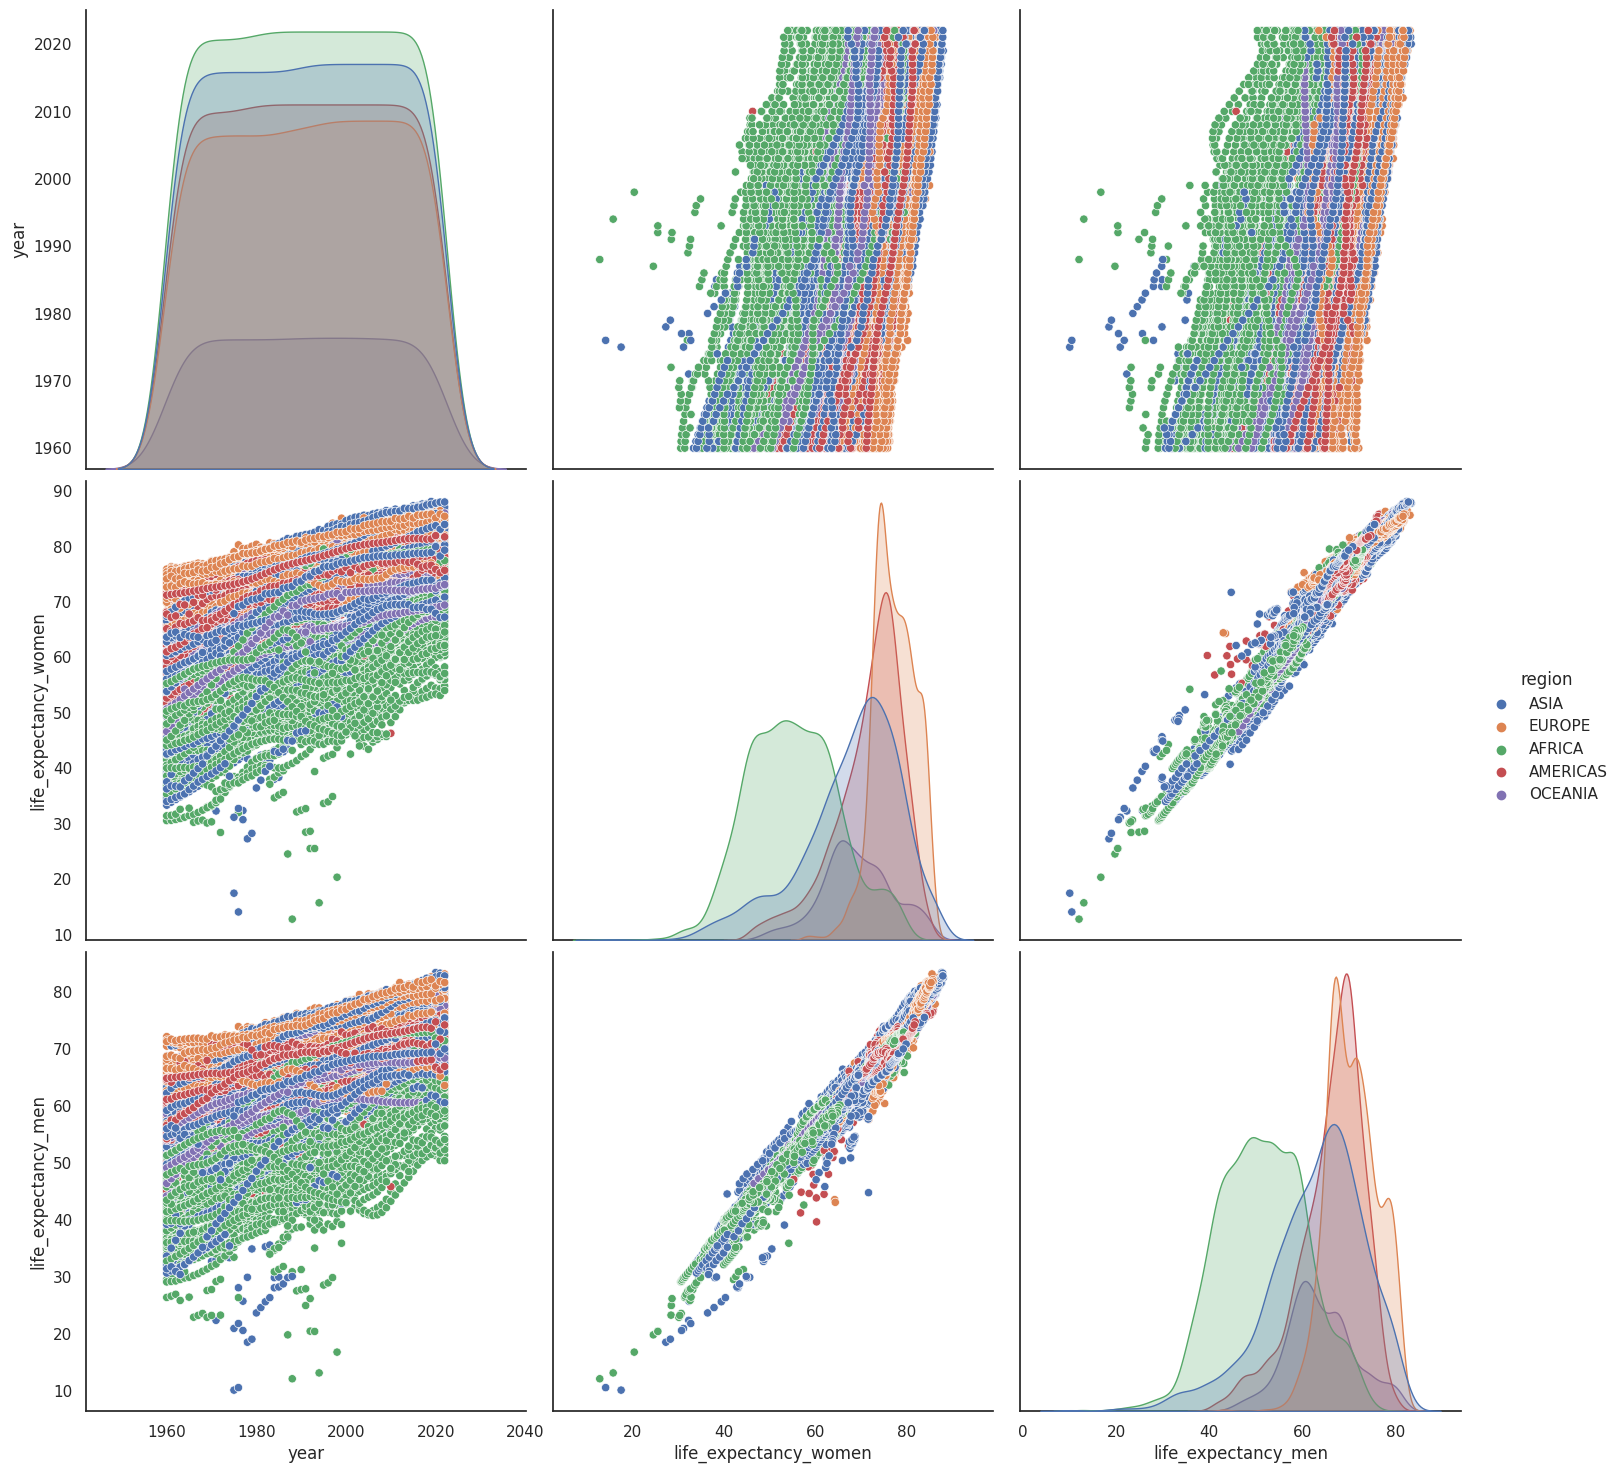

In [37]:
sns.pairplot(df_data, hue="region", size=5)

In [27]:
# Crear figura con dos subgráficos
fig = make_subplots(rows=1, 
                    cols=2, 
                    subplot_titles=("Life Expectancy Women", "Life Expectancy Mens"))

# Agregar histograma de mujeres
fig.add_trace(go.Histogram(x=df_data["life_expectancy_women"],
                           nbinsx=30, 
                           name="Mujeres", 
                           marker_color="salmon"), 
              row=1, col=1)

# Agregar histograma de hombres
fig.add_trace(go.Histogram(x=df_data["life_expectancy_men"], 
                           nbinsx=30, 
                           name="Hombres",
                           marker_color="skyblue"), 
              row=1, col=2)

# Configurar diseño
fig.update_layout(title_text="Distribution of Life Expectancy", showlegend=False, height=height)
fig.update_xaxes(title_text="Life Expectancy (Years)", row=1, col=1)
fig.update_xaxes(title_text="Life Expectancy (Years)", row=1, col=2)


if kaggle:
    fig.show(renderer='iframe_connected')
else:
    fig.show()


In [15]:
# Crear figura con dos boxplots en columnas
fig_box = make_subplots(rows=1, cols=2, subplot_titles=("Life expectancy women", "Life expectancy mens"))

# Boxplot de mujeres
fig_box.add_trace(go.Box(y=df_data["life_expectancy_women"], name="Women", marker_color="salmon"), row=1, col=1)

# Boxplot de hombres
fig_box.add_trace(go.Box(y=df_data["life_expectancy_men"], name="Men", marker_color="skyblue"), row=1, col=2)

# Configurar diseño
fig_box.update_layout(title_text="Distribution life expectancy women-men - Boxplots", showlegend=False, height=height)
fig_box.update_yaxes(title_text="Life expectancy", row=1, col=1)
fig_box.update_yaxes(title_text="Life expectancy", row=1, col=2)


if kaggle:
    fig_box.show(renderer='iframe_connected')
else:
    fig_box.show()


In [28]:
# Calcular la esperanza de vida promedio por año
df_trend = df_data.groupby("year")[["life_expectancy_women", "life_expectancy_men"]].mean().reset_index()

# Crear gráfico de líneas con Plotly
fig_trend = go.Figure()

fig_trend.add_trace(go.Scatter(x=df_trend["year"], 
                               y=df_trend["life_expectancy_women"], 
                               mode="lines", 
                               name="Women",
                               line=dict(color="salmon")))

fig_trend.add_trace(go.Scatter(x=df_trend["year"],
                               y=df_trend["life_expectancy_men"],
                               mode="lines", 
                               name="Hombres", 
                               line=dict(color="skyblue")))

# Configurar diseño
fig_trend.update_layout(title="Evolution of Life expectancy",
                        xaxis_title="Year",
                        yaxis_title="Life expectancy life (Years)",
                        legend_title="genere",
                        height=height)


if kaggle:
    fig_trend.show(renderer='iframe_connected')
else:
    fig_trend.show()


## Distribution of Life expectancy of Women by region of the world

In [29]:
fig_women = px.box(df_data,
                   x='region',
                   y='life_expectancy_women',
                   color='region')

fig_women.update_layout(title_text="Life expectancy by region of Women",
                        height=height)


if kaggle:
    fig_women.show(renderer='iframe_connected')
else:
    fig_women.show()

## Distribution of Life expectancy of men by region of the world

In [30]:
fig_women = px.box(df_data,
                   x='region',
                   y='life_expectancy_men',
                   color='region')

fig_women.update_layout(title_text="Life expectancy by region of Men",
                        height=height)


if kaggle:
    fig_women.show(renderer='iframe_connected')
else:
    fig_women.show()

## Analysis of last year

In [31]:
# Obtener el año más reciente disponible en el dataset
latest_year = df_data["year"].max()

# Filtrar los datos del año más reciente
df_latest = df_data[df_data["year"] == latest_year]

# Obtener los 5 países con mayor y menor esperanza de vida para mujeres
top_countries_women = df_latest.nlargest(5, "life_expectancy_women")
bottom_countries_women = df_latest.nsmallest(5, "life_expectancy_women")

# Obtener los 5 países con mayor y menor esperanza de vida para hombres
top_countries_men = df_latest.nlargest(5, "life_expectancy_men")
bottom_countries_men = df_latest.nsmallest(5, "life_expectancy_men")

## Countries with hight and low expectancy life

In [32]:
# Concatenar para graficar
df_women = pd.concat([top_countries_women, bottom_countries_women])
df_men = pd.concat([top_countries_men, bottom_countries_men])

# Gráfico para mujeres
fig_women = px.bar(df_women,
                   x="life_expectancy_women",
                   y="country_name", 
                   color="life_expectancy_women",
                   title=f"Países con Mayor y Menor Esperanza de Vida - Mujeres ({latest_year})",
                   labels={"life_expectancy_women": "Esperanza de Vida (años)", "country_name": "País"},
                   height=height, 
                   orientation="h", 
                   color_continuous_scale="Blues")

# Gráfico para hombres
fig_men = px.bar(df_men,
                 x="life_expectancy_men", 
                 y="country_name", 
                 color="life_expectancy_men",
                 title=f"Países con Mayor y Menor Esperanza de Vida - Hombres ({latest_year})",
                 labels={"life_expectancy_men": "Esperanza de Vida (años)", "country_name": "País"},
                 height=height,
                 orientation="h",
                 color_continuous_scale="Reds")


if kaggle:
    fig_women.show(renderer='iframe_connected')
    fig_men.show(renderer='iframe_connected')
else:
    fig_women.show()
    fig_men.show()


## GAP of life expectancy between women and men

In [33]:
# Calcular la brecha de esperanza de vida (mujeres - hombres)
df_latest["life_expectancy_gap"] = df_latest["life_expectancy_women"] - df_latest["life_expectancy_men"]

# Obtener los 5 países con mayor y menor brecha de esperanza de vida
top_gap_countries = df_latest.nlargest(10, "life_expectancy_gap")
bottom_gap_countries = df_latest.nsmallest(10, "life_expectancy_gap")

# Concatenar datos para graficar
df_gap = pd.concat([top_gap_countries, bottom_gap_countries])

# Crear gráfico de brecha de esperanza de vida
fig_gap = px.bar(df_gap,
                 x="life_expectancy_gap",
                 y="country_name", 
                 color="life_expectancy_gap",
                 title=f"Brecha de Esperanza de Vida entre Mujeres y Hombres ({latest_year})",
                 labels={"life_expectancy_gap": "Diferencia (años)", "country_name": "País"},
                 height=height, 
                 orientation="h", 
                 color_continuous_scale="Viridis")


if kaggle:
    fig_gap.show(renderer='iframe_connected')
else:
    fig_gap.show()


## Map life expectancy at birth of women

In [34]:
import plotly.express as px

# Crear un mapa mundial de esperanza de vida para el año más reciente
fig_map = px.choropleth(df_latest, 
                        locations="country_code", 
                        locationmode="ISO-3",
                        color="life_expectancy_women",
                        hover_name="country_name",
                        title=f"Esperanza de Vida de las Mujeres en el Mundo ({latest_year})",
                        labels={"life_expectancy_women": "Esperanza de Vida (años)"},
                        color_continuous_scale="magenta")


fig_map.update_layout(height = height,
                      margin={"r":0,"t":0,"l":0,"b":0},
                      title_text = f"Life expectancy women ath birth of ({latest_year})")

# Mostrar el mapa
if kaggle:
    fig_map.show(renderer='iframe_connected')
else:
    fig_map.show()


## Map of life expectancy at birth of men

In [35]:
import plotly.express as px

# Crear un mapa mundial de esperanza de vida para el año más reciente
fig_map = px.choropleth(df_latest, 
                        locations="country_code", 
                        locationmode="ISO-3",
                        color="life_expectancy_men",
                        hover_name="country_name",
                        title=f"Esperanza de Vida de las Mujeres en el Mundo ({latest_year})",
                        labels={"life_expectancy_women": "Esperanza de Vida (años)"},
                        color_continuous_scale="Blues")


fig_map.update_layout(height = height,
                      margin={"r":0,"t":0,"l":0,"b":0},
                      title_text = f"Life expectancy men ath birth of ({latest_year})")

if kaggle:
    fig_map.show(renderer='iframe_connected')
else:
    fig_map.show()
